<a href="https://colab.research.google.com/github/adithyarajagopal/Cogniable_intern_Time_Series/blob/main/Copy_of_Cogniable_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,TimeDistributed,Bidirectional,GRU
from keras.callbacks import History
import matplotlib.pyplot as plt
from keras.regularizers import L1L2

In [ ]:
import pandas  as pd
xls = pd.ExcelFile("/content/target_code.xlsx")
print(xls.sheet_names)
df = xls.parse("Natasha")
df.head()

['Natasha', 'Vince', 'Prabal', 'Sadat', 'Vidhyutkrishna', 'Galdamez', 'Adriano', 'Eric']


,Code,Date,Unnamed: 2,age(months),"gender(0-male,1-female)",vineland score,subdomain1 score,subdomain2 score,subdomain3 score,Target area code 1,Target area code 1 score,Target area code 2 score,days to mastery target area code 1,days to mastery target area code 1.1
0,11.100030,2020-08-19,NaN,79,1,0,10,9,NaN,11.10,NaN,NaN,NaN,NaN
1,1.100400,2020-08-19,NaN,79,1,0,22,20,NaN,1.10,NaN,NaN,NaN,NaN
2,1.100400,2020-08-19,NaN,79,1,0,22,20,NaN,1.10,NaN,NaN,NaN,NaN
3,6.130005,2020-08-19,NaN,79,1,0,22,20,NaN,6.11,NaN,NaN,NaN,NaN
4,5.900100,2020-08-24,NaN,79,1,0,16,14,NaN,5.10,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Code', 'Date', 'Unnamed: 2', 'age(months)', 'gender(0-male,1-female)',
       'vineland score', 'subdomain1 score', 'subdomain2 score',
       'subdomain3 score', 'Target area code 1', 'Target area code 1 score',
       'Target area code 2 score', 'days to mastery target area code 1',
       'days to mastery target area code 1.1'],
      dtype='object')

In [ ]:
df[['gender(0-male,1-female)','Target area code 1','Code','age(months)','vineland score','subdomain1 score','subdomain2 score']].head()

,"gender(0-male,1-female)",Target area code 1,Code,age(months),vineland score,subdomain1 score,subdomain2 score
0,1,11.10,11.100030,79,0,10,9
1,1,1.10,1.100400,79,0,22,20
2,1,1.10,1.100400,79,0,22,20
3,1,6.11,6.130005,79,0,22,20
4,1,5.10,5.900100,79,0,16,14


<b> 1. Creating the vectors of Multivariate Data </b>

In [ ]:
temp1 = []
temp2 = []
for _n in xls.sheet_names:
  print("[INFO] Processing ",_n)
  df = xls.parse(_n)
  sub_df = df[['gender(0-male,1-female)','Target area code 1','Code','age(months)','vineland score','subdomain1 score','subdomain2 score']].copy()
  sub_df.dropna(axis=0,inplace=True)
  sub_df = sub_df.astype('float')
  print(sub_df.dtypes)
  temp1.append(sub_df.to_numpy())
  temp2.append(sub_df['Code'])
  print("\n\n")

[INFO] Processing  Natasha
gender(0-male,1-female)    float64
Target area code 1         float64
Code                       float64
age(months)                float64
vineland score             float64
subdomain1 score           float64
subdomain2 score           float64
dtype: object



[INFO] Processing  Vince
gender(0-male,1-female)    float64
Target area code 1         float64
Code                       float64
age(months)                float64
vineland score             float64
subdomain1 score           float64
subdomain2 score           float64
dtype: object



[INFO] Processing  Prabal
gender(0-male,1-female)    float64
Target area code 1         float64
Code                       float64
age(months)                float64
vineland score             float64
subdomain1 score           float64
subdomain2 score           float64
dtype: object



[INFO] Processing  Sadat
gender(0-male,1-female)    float64
Target area code 1         float64
Code                       float64
age(mo

In [ ]:
#Pre-processing for input#
in_seq = []
for i in temp1:
  for j in i:
    in_seq.append(j)

In [ ]:
#Pre-processing for output#
out_seq = []
import math
for i in temp2:
  for j in i:
    out_seq.append((math.log(j)))

In [ ]:
# Converting list into numpy array#
in_seq = np.array(in_seq)
out_seq = np.array(out_seq)
print(in_seq.shape)
print(out_seq.shape)

(78, 7)
(78,)


#### Applying Min-Max scaler
* As the data is different for each columns

In [ ]:
from sklearn.preprocessing import quantile_transform
scaler = MinMaxScaler()
scaler.fit(in_seq)
in_seq = scaler.transform(in_seq)

In [ ]:
out_seq = out_seq[:,np.newaxis,np.newaxis]
print(out_seq[0])


[[2.40694781]]


In [ ]:
print(out_seq.shape)

(78, 1, 1)


In [ ]:
for i in range(0,10):
  x,y = in_seq[i],out_seq[i]
  print('%s => %s' % (x, y))
  print("\n")

[1.         0.50251256 0.50185588 0.7755102  0.         0.21276596
 0.23076923] => [[2.40694781]]


[1.00000000e+00 0.00000000e+00 1.50557817e-05 7.75510204e-01
 0.00000000e+00 4.68085106e-01 5.12820513e-01] => [[0.09567375]]


[1.00000000e+00 0.00000000e+00 1.50557817e-05 7.75510204e-01
 0.00000000e+00 4.68085106e-01 5.12820513e-01] => [[0.09567375]]


[1.         0.25175879 0.25243051 0.7755102  0.         0.46808511
 0.51282051] => [[1.81319557]]


[1.         0.20100503 0.24089251 0.7755102  0.         0.34042553
 0.35897436] => [[1.7749693]]


[1.         0.30653266 0.16561862 0.7755102  0.         0.34042553
 0.35897436] => [[1.48164999]]


[1.         0.15577889 0.15558645 0.7755102  0.         0.34042553
 0.35897436] => [[1.43515595]]


[1.         0.30653266 0.30216502 0.79591837 0.         0.46808511
 0.51282051] => [[1.96304957]]


[1.         0.20100503 0.24089251 0.79591837 0.         0.34042553
 0.35897436] => [[1.7749693]]


[1.         0.16582915 0.16562364 0.79591837 0

<b> 2. Creating Time Series Generator </b>

In [ ]:
generator = TimeseriesGenerator(in_seq, out_seq, length=1, batch_size=1)

In [ ]:
# First 10 samples from generator#
for i in range(0,10):
	x, y = generator[i]
	print('%s => %s' % (x, y))

[[[1.         0.50251256 0.50185588 0.7755102  0.         0.21276596
   0.23076923]]] => [[[0.09567375]]]
[[[1.00000000e+00 0.00000000e+00 1.50557817e-05 7.75510204e-01
   0.00000000e+00 4.68085106e-01 5.12820513e-01]]] => [[[0.09567375]]]
[[[1.00000000e+00 0.00000000e+00 1.50557817e-05 7.75510204e-01
   0.00000000e+00 4.68085106e-01 5.12820513e-01]]] => [[[1.81319557]]]
[[[1.         0.25175879 0.25243051 0.7755102  0.         0.46808511
   0.51282051]]] => [[[1.7749693]]]
[[[1.         0.20100503 0.24089251 0.7755102  0.         0.34042553
   0.35897436]]] => [[[1.48164999]]]
[[[1.         0.30653266 0.16561862 0.7755102  0.         0.34042553
   0.35897436]]] => [[[1.43515595]]]
[[[1.         0.15577889 0.15558645 0.7755102  0.         0.34042553
   0.35897436]]] => [[[1.96304957]]]
[[[1.         0.30653266 0.30216502 0.79591837 0.         0.46808511
   0.51282051]]] => [[[1.7749693]]]
[[[1.         0.20100503 0.24089251 0.79591837 0.         0.34042553
   0.35897436]]] => [[[1.4816

<b> 3. Creating the keras model </b>

In [ ]:
n_features = in_seq.shape[1]
n_steps = 1

In [ ]:
history = History()
# define model
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(n_steps, n_features),dropout=0.3,recurrent_dropout=0.2,bias_regularizer=L1L2(l1=0.0, l2=0.01),))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 1, 100)            43200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 1, 1)              101       
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduce_lr = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model.fit_generator(generator, steps_per_epoch=1, epochs=30, verbose=0,callbacks=[history])#callbacks=[keras.callbacks.EarlyStopping(monitor='loss', min_delta=0,patience=20, verbose=1, mode='min'),history])

In [ ]:
model.fit_generator(generator, steps_per_epoch=1, epochs=70, verbose=0,callbacks=[history])#callbacks=[keras.callbacks.EarlyStopping(monitor='loss', min_delta=0,patience=20, verbose=1, mode='min'),history])

In [ ]:
print(history.history['loss'][-5:])

[1.0477242469787598, 1.2388026714324951, 1.738121747970581, 3.892974376678467, 1.7914609909057617]


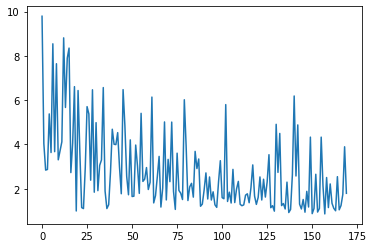

In [ ]:
plt.plot(history.history['loss'])

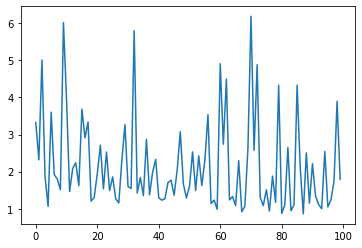

In [ ]:
plt.plot(history.history['loss'][-100:])

#### Testing GRU

In [ ]:
history = History()
# define model
model = Sequential()
model.add(GRU(100, activation='tanh', return_sequences=True, input_shape=(n_steps, n_features),dropout=0.3,recurrent_dropout=0.2,bias_regularizer=L1L2(l1=0.0, l2=0.01),))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1, 100)            32700     
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 1, 1)              101       
Total params: 32,801
Trainable params: 32,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduce_lr = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model.fit_generator(generator, steps_per_epoch=1, epochs=30, verbose=0,callbacks=[history])#callbacks=[keras.callbacks.EarlyStopping(monitor='loss', min_delta=0,patience=20, verbose=1, mode='min'),history])

In [ ]:
model.fit_generator(generator, steps_per_epoch=1, epochs=70, verbose=0,callbacks=[history])#callbacks=[keras.callbacks.EarlyStopping(monitor='loss', min_delta=0,patience=20, verbose=1, mode='min'),history])

In [ ]:
print(history.history['loss'][-5:])

[0.16680411994457245, 0.20375028252601624, 0.26585984230041504, 2.686875581741333, 0.34418097138404846]


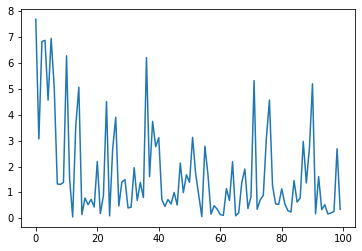

In [ ]:
plt.plot(history.history['loss'])

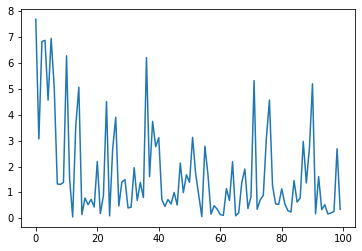

In [ ]:
plt.plot(history.history['loss'][-100:])

<b> Bi-Directional LSTM

In [ ]:
history = History()
# define model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', return_sequences=True), input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1, 200)            86400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 200)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 1, 1)              201       
Total params: 86,601
Trainable params: 86,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduce_lr = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model.fit_generator(generator, steps_per_epoch=1, epochs=30, verbose=0,callbacks=[history])#callbacks=[keras.callbacks.EarlyStopping(monitor='loss', min_delta=0,patience=20, verbose=1, mode='min'),history])

In [ ]:
model.fit_generator(generator, steps_per_epoch=1, epochs=70, verbose=0,callbacks=[history])#callbacks=[keras.callbacks.EarlyStopping(monitor='loss', min_delta=0,patience=20, verbose=1, mode='min'),history])

In [ ]:
print(history.history['loss'][-5:])

[0.02573176473379135, 0.7260339856147766, 0.2889731824398041, 0.05417386442422867, 0.19585952162742615]


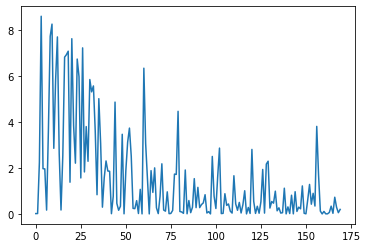

In [ ]:
plt.plot(history.history['loss'])

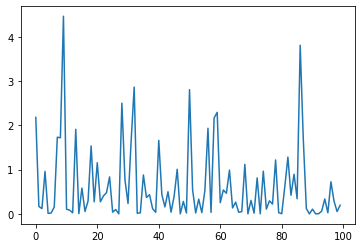

In [ ]:
plt.plot(history.history['loss'][-100:])

### Auto-Encoders

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
history = History()
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(n_steps, n_features)))
model.add(RepeatVector(n_steps))
model.add(LSTM(100, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=0,callbacks=[history])

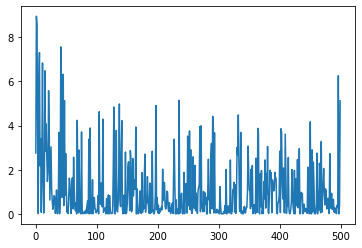

In [ ]:
plt.plot(history.history['loss'])

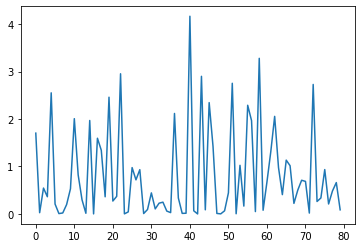

In [ ]:
plt.plot(history.history['loss'][-90:-10])

#### Random Forest 

<b> Using log </b>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(in_seq,np.squeeze(out_seq))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
yhat = model.predict(in_seq)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.squeeze(out_seq),yhat)

0.00038377110551082554

<b> Without log </b>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(in_seq,np.squeeze(out_seq))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
yhat = model.predict(in_seq)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.squeeze(out_seq),yhat)

0.004938007985269754

### XGBoost

<b> With Log </b>

In [ ]:
import xgboost as xg 

In [ ]:
xgb_r =xg.XGBRegressor(max_depth=120,learning_rate=0.3466660346275105,n_estimators=76,objective='reg:squarederror',gamma=0.01844254353769151,base_score=0.5782829704568522)

In [ ]:
xgb_r.fit(in_seq, np.squeeze(out_seq)) 

XGBRegressor(base_score=0.5782829704568522, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0.01844254353769151, importance_type='gain',
             learning_rate=0.3466660346275105, max_delta_step=0, max_depth=120,
             min_child_weight=1, missing=None, n_estimators=76, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
yhat = xgb_r.predict(in_seq)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.squeeze(out_seq),yhat)

0.0008294469488079045

<b> Without Log </b>

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xg 

In [ ]:
xgb_r =xg.XGBRegressor(max_depth=120,learning_rate=0.3466660346275105,n_estimators=76,objective='reg:squarederror',gamma=0.01844254353769151,base_score=0.5782829704568522)

In [ ]:
xgb_r.fit(in_seq, np.squeeze(out_seq)) 

XGBRegressor(base_score=0.5782829704568522, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0.01844254353769151, importance_type='gain',
             learning_rate=0.3466660346275105, max_delta_step=0, max_depth=120,
             min_child_weight=1, missing=None, n_estimators=76, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
yhat = xgb_r.predict(in_seq)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.squeeze(out_seq),yhat)

0.0022066470775980083